<a href="https://colab.research.google.com/github/Willian-Campos/DeepLearn-Apprenticeship/blob/main/MNIST_Tensorflow/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Confirmando qual ambiente meu python está rodando
import sys
sys.executable

'C:\\Users\\Bill_\\anaconda3\\envs\\DeepLearn\\python.exe'

## O que é o MNIST

O dataset MNIST (Modified National Institute of Standards and Technology database) é um conjunto de dados amplamente utilizado na área de aprendizado de máquina e visão computacional. Ele consiste em imagens de dígitos numéricos de 0 a 9, escritas à mão, e é projetado para ser um benchmark padrão para algoritmos de classificação.

## Por quê Tensorflow?

Comunidade ativa: Tem uma vasta comunidade de desenvolvedores e suporte oficial do Google, com documentação detalhada e recursos didáticos.

Adoção por empresas e academias: É amplamente utilizado em produção e pesquisa por empresas de tecnologia, startups, e instituições acadêmicas ao redor do mundo.

Open source: Por ser gratuito e de código aberto, é acessível para desenvolvedores de todos os níveis.

## Bibliotecas

In [47]:
# ML
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Usado para o One-Hot-Encoding

# Visualização
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt

# Matemática/Estatistica
import numpy as np

In [3]:
# Carregando o dataset MNIST diretamente do TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #load_data(): É uma função fornecida pelo TensorFlow dentro de tf.keras.datasets.

# x_train: Imagens de entrada para treinamento.
# y_train: Rótulos correspondentes às imagens do treinamento.
# x_test: Imagens de entrada para teste.
# y_test: Rótulos correspondentes às imagens do teste.

# Entendendo os Dados

| Variável    | Tipo         | Dimensão         | Descrição                                                                                          |
|-------------|--------------|------------------|--------------------------------------------------------------------------------------------------|
| `x_train`   | NumPy Array  | (60000, 28, 28)  | 60.000 imagens para treinamento. Cada imagem é uma matriz 28x28 com valores inteiros representando a intensidade de brilho (de 0 a 255). |
| `y_train`   | NumPy Array  | (60000,)         | 60.000 rótulos associados às imagens de treinamento. Cada rótulo é um número de 0 a 9 que indica o dígito representado na imagem. |
| `x_test`    | NumPy Array  | (10000, 28, 28)  | 10.000 imagens para teste. O formato é idêntico ao do conjunto de treinamento, mas usado para avaliar o desempenho do modelo. |
| `y_test`    | NumPy Array  | (10000,)         | 10.000 rótulos associados às imagens de teste.                                                   |

In [4]:
# Verificando os tamanhos dos conjuntos
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Exemplo de um rótulo e sua imagem associada
print(f"\nRótulo da primeira imagem de treinamento: {y_train[0]}")

# Visualizando a matriz de pixels da primeira imagem
print(f"\nMatriz de pixels da primeira imagem:\n\n{x_train[0]}")

x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)

Rótulo da primeira imagem de treinamento: 5

Matriz de pixels da primeira imagem:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0  

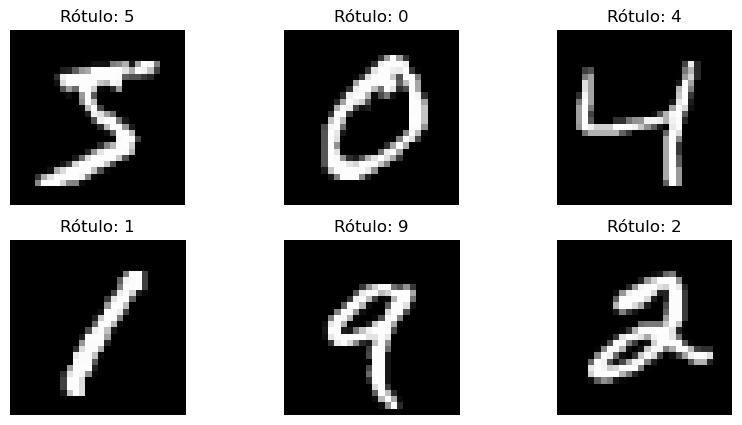

In [5]:
# Visualizando uma amostra de imagens
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Rótulo: {y_train[i]}")
    plt.axis('off')
plt.show()

# Ajeitando os Dados

### Normalização dos valores
<br>

##### Para o modelo de aprendizado ter melhor desempenho, os valores do brilho que variam de 0 a 255 vão agora varior do 0 a 1.
<br><br>

##### * Evita problemas de escala: Redes neurais trabalham melhor quando os dados de entrada estão em escalas semelhantes. Valores muito altos podem causar problemas numéricos, como gradientes instáveis ou dificuldades no aprendizado.
<br>

##### * Melhora a convergência: Normalizar os dados acelera o treinamento do modelo, pois os gradientes gerados durante o processo de retropropagação tendem a ser mais estáveis.
<br>

##### * Ajuda em redes profundas: Em redes neurais profundas, valores não normalizados podem levar à saturação de funções de ativação como sigmoid, resultando no problema do gradiente "desvanecente". Embora o ReLU (comumente usado hoje) seja menos afetado, a normalização ainda melhora o desempenho.

In [6]:
# Normalizando os dados
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# Verificando como ficou depois da normalização
print(f"\nMatriz de pixels da primeira imagem:\n\n{x_train[0]}")


Matriz de pixels da primeira imagem:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

### Por que o one-hot encoding é necessário?

Os rótulos do MNIST variam de **0 a 9**, e inicialmente eles estão em formato de **inteiros**. No entanto, o formato necessário depende da camada de saída da rede:

- **Saída da rede (softmax):**  
  Em muitas redes, a camada de saída usa a função de ativação `softmax`, que retorna um vetor de probabilidades para cada classe. Para que isso funcione corretamente, os rótulos devem ser representados como vetores de **one-hot encoding**.

  **Exemplo:**  
  - Rótulo original: `3`  
  - One-hot encoding: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

- **Cálculo da perda (categorical_crossentropy):**  
  A função de perda usada em classificação, como `categorical_crossentropy`, espera que os rótulos estejam no formato de **one-hot encoding** para comparar com a saída da rede.

In [8]:
# Convertendo os rótulos para one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
# Mostrando como que ficou a estrutura
x = 0
while x < 5:
    print(y_train[x])
    x=x+1

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Construção do Modelo

#### Função de Ativação
<br>

##### A função de ativação é um dos elementos mais importantes em uma rede neural, pois ela decide como o resultado de um neurônio será transformado antes de ser passado para a próxima camada. Sem uma função de ativação, a rede neural se comportaria como um modelo linear, incapaz de lidar com relações complexas e não-lineares nos dados.
<br>

##### Cada função de ativação tem sua fórmula matemática diferente e vai "moldar" a função de acordo com essa fórmula, dando um aspecto diferente ao resultado dependendo da função de ativação utilizado. 
[Função de Ativação](https://www.youtube.com/watch?v=cqDiD2hJTc4&list=PLQH6T1jnIb5J7vugBAauJsFU8Qgvuf-4X&index=5)

### Funções de Ativação:

| **Função**             | **Fórmula**                             | **Intervalo de saída**     | **Características principais**                                                                                          |
|-------------------------|-----------------------------------------|-----------------------------|--------------------------------------------------------------------------------------------------------------------------|
| **ReLU**               | \( \max(0, x) \)                      | \([0, \infty)\)           | Simples, eficiente, mas pode sofrer de neurônios mortos.                                                                |
| **Leaky ReLU**         | \( \max(\alpha x, x) \)               | \((-\infty, \infty)\)     | Corrige o problema da ReLU.                                                                                             |
| **Sigmoid**            | \( \frac{1}{1 + e^{-x}} \)            | \([0, 1]\)                | Boa para probabilidades, mas sofre de desvanecimento do gradiente.                                                      |
| **Tanh**               | \( \tanh(x) \)                        | \([-1, 1]\)               | Centralizada em zero, mas também sofre de desvanecimento do gradiente.                                                  |
| **Softmax**            | \( \frac{e^{x_i}}{\sum_{j} e^{x_j}} \) | \([0, 1]\) para cada valor | Usada em classificação multiclasse, produz probabilidades.                                                              |
| **Swish**              | \( x \cdot \text{sigmoid}(x) \)       | \((-\infty, \infty)\)     | Suaviza a ReLU e pode melhorar o desempenho em redes profundas.                                                         |
| **ELU**                | \( f(x) = x \) se \( x > 0 \), \( \alpha(e^x - 1) \) se \( x \leq 0 \) | \((-\alpha, \infty)\) | Suaviza valores negativos e ajuda em redes profundas.                                                                   |
| **GELU**               | \( f(x) = x \cdot P(X \leq x) \)      | \((-\infty, \infty)\)     | Função suave e moderna, usada em transformers (ex.: BERT).                                                              |
| **Maxout**             | \( f(x) = \max(w_1^Tx + b_1, w_2^Tx + b_2) \) | Não limitado           | Seleciona a máxima entre funções lineares; consome mais memória.                                                        |
| **Hard Sigmoid**       | \( f(x) = \max(0, \min(1, 0.2x + 0.5)) \) | \([0, 1]\)             | Aproximação computacionalmente eficiente da Sigmoid.                                                                    |
| **Hard Swish**         | \( f(x) = x \cdot \frac{\max(0, \min(1, x + 3))}{6} \) | \((-\infty, \infty)\) | Aproximação eficiente do Swish, usada em arquiteturas móveis (ex.: MobileNetV3).                                        |
| **Softplus**           | \( f(x) = \ln(1 + e^x) \)             | \((0, \infty)\)           | Suaviza a ReLU, mas mais computacionalmente intensiva.                                                                  |
| **Thresholded ReLU**   | \( f(x) = x \) se \( x > \text{threshold} \), \( 0 \) caso contrário | \([0, \infty)\) | Variante da ReLU com limiar controlável.                                                                                |

##### Como é meu primeiro contato com CNN vou procurar explicar cada item em detalhes.

In [10]:
# Definindo o modelo
model = tf.keras.models.Sequential()
# Sequential faz com que as camadas sejam feitas em sequencia (derrr), mas tem outros modos como o 
# funcional e o subclassificado, mas para começar o Sequential parece simples e resolve super bem.

##### Primeira Camada Convolucional

In [11]:
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Conv2D: 
'''É um tipo de camada 2D usado para realizar contas matemáticas em redes neurais convolucionais, 
a convolução é a união das informações obtidas por cada camada e seu resultado final.'''
# 32:
'''Esse número se refere ao número de filtros que vão ser usados, cada filtro aprende a detectar 
caracteristicas diferentes na imagem'''
# 3, 3:
'''Esses são os valores da dimensão dos filtros, no caso 3 pixel de altura e largura respectivamente,
 eles vão "varrer" a imagem para identificar os padrões e é bom que sejam pequenos para não ser
 muito generalista (do contrário não vai identificar detalhes), mais pra frente podemos brincar com esses
 valores em pró de encontrar um ponto ótimo nos resultados'''
# relu:
'''ReLU (Rectified Linear Unit), é a função de ativação do modelo, vou começar com o mais classico e básico,
 posteriormente é possível rodar com funções de ativação diferentes para comparar.'''
# input shape em 28, 28, 1:
'''Esses valores são referentes a dimensão dos valores de entrada, como visto anteriormente as imagens
do MNIST são 28 por 28 pixels, o valor 1 é referente as cores que são preto e branco e não tem 
canais de cor.'''

C:\Users\Bill_\anaconda3\envs\DeepLearn\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


'Esses valores são referentes a dimensão dos valores de entrada, como visto anteriormente as imagens\ndo MNIST são 28 por 28 pixels, o valor 1 é referente as cores que são preto e branco e não tem \ncanais de cor.'

##### Camada de Pooling (Redução de Dimensionalidade)

#### Pooling
<br>

##### O pooling é um método de redução da dimensionalidade da imagem, ao aplicar o pooling de 2x2 estamos diminuindo a imagem pela metade, isso ajuda a diminuir a quantidade de calculos feito pela rede(agilidade), da foco apenas onde realmente importa(não perde tempo com bordas ou espaços que não trasem informação) e previne overfitting(deixa mais generalista) deixando mais robusto a pequenas mudanças.
<br>

##### Então na imagem 28x28 passando max pooling 2x2 o que acontece é que primeiramente vai ser pego os dois primeiros valores da primeira linha, junto aos dois primeiros valores da segunda linha e salvar o maior valor, depois o terceiro e quarto valor da primeira e segunda linha e salvar o maior e assim por diante até acabar a primeira e segunda linha, o mesmo será feito na terceira e quarta linha até que acabe e assim por diante e até que chegue a 27º e 28º linha, sempre formando um quadrado 2x2 e pegando o maior valor, esses valores máximos vão formar uma imagem nova.
<br>

##### O mesmo também pode ser feito usando a média ao invés do máximo, mas como é um chute inicial preferi por enquanto usar o mais comum em todos os passos. Segue o vídeo abaixo falando sobre pooling:
<br>

[Pooling](https://www.youtube.com/watch?v=lhX-ftjMIRg)

In [12]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# MaxPooling2D:
'''Vai comprimir as informações de uma área da imagem e manter as caracteristicas mais importantes, 
descartando as demais'''
# 2, 2:
'''Aqui é definido a área comprimida, no caso 2 pixels de altura por 2 pixels de largura'''

'Aqui é definido a área comprimida, no caso 2 pixels de altura por 2 pixels de largura'

##### Segunda Camada Convolucional
<br>

##### Faz a mesma coisa que a primeira camada, porém aqui tem mais filtros(o dobro) e a imagem já passou pelo processo de pooling, então na prática está pegando pequenos detalhes que antes tinham sido visto de forma mais geral.

In [13]:
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

##### Camada Flatten
<br>

##### Essa camada serve para preparar os dados que estão multidimensionais em uma única dimensão, ou seja, as linhas vão ser empilhadas formando uma única coluna, esse formato é esperado pela camada de saída que espera um vetor 1D.

In [14]:
model.add(tf.keras.layers.Flatten())

##### Camada Densa
<br>

##### A camada abaixo é uma camada densa, ela é diferente das anteriores que são camadas convolucionais, as camadas anteriores servem para identificar pequenas partes da imagem e a camada densa vai juntar essas partes, como um quebra cabeça, já que ela tem ligação completa com todos neurônios da camada anterior.
<br>

##### Aqui pode surgir a pergunta, mas por quê usar varios pedaços da imagem se é possível identificar tudo de uma vez? Acontece que separar por partes ajuda a identificar imagens em diferentes situações, mesmo se ela se encontrar em uma posição diferente, estar cortada ou borrada, com a CNN é possível identificar pelo menos uma parte da imagem e o softmax pode dar uma estimativa de quão provavel a imagem seja classificada como tal.
<br>

##### No link abaixo tem uma explicação mais detalhada por um artigo da didatica tech:
[CNN vs DNN](https://didatica.tech/introducao-a-redes-neurais-convolucionais/)

In [15]:
model.add(tf.keras.layers.Dense(64, activation='relu'))

##### Camada de Saída
<br>

##### A camada de saída abaixo tem 10 neurônios, um para cada valor do MNIST que vai de 0 a 9 e a função de ativação SOFTMAX vai usar a probabilidade do resultado ser um desses neurônios e vai variar os valores de 0 a 1, sendo 1 mais provavel.
<br>

##### Exemplo: Vamos dizer que a resposta é 9 então o ideal é que o neurônio que representa 9 chegue próximo de 1, porém outros números/neurônios podem ser similares e ter uma boa pontuação, chegando próximo ou até ultrapassando o neurônio que representa o 9, como por exemplo um valor 7, se for parar pra pensar é só fazer uma barriguinha em baixo do 7 e ele vira o 9. 
<br>

##### Vamos esperar que a segunda camada e a camada densa tragam bons resultados para isso não acontecer  :D 

In [16]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

##### Compilação do Modelo
<br>

##### Na compilação vamos definir como o modelo será treinado, atualizando os pesos e avaliando os erros, abaixo vou descrever cada hyperparametro.

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Optimizer
'''Aqui é onde vai ser calculado/atualizado os pesos durante o treinamento, 
aqui é usado o famoso gradiente descendente, acesse o link da cédula abaixo para saber mais'''

# Adam (Adaptive Moment Estimation)
'''Aqui vou precisar tirar um tempo para estudar mais, pois é uma aplicação de matemática 
    mais profunda, porém Adam é um otimizador que funciona bem para a maioria dos problemas'''
    
# Loss
'''Aqui é a mesma situação de aprendizado de máquina classico/tabular, medido a diferença entre 
as predições do modelo e os rótulos/resultado para parte do treinamento.

Para problemas de multiplas classes geralmente é usado o categorical_crossentropy:
Aqui é comparado a saída do softmax(os valores de 0 a 1 que dão as "probabilidades") 
com os rótulos em one-hot encoded, é penalizado as predições erradas para o modelo aprender 
a ajustar os pesos e melhorar a predição, quanto mais errado maior a penalização.'''

# Metrics
'''Como nos modelos classicos, aqui são as métricas que podem ser usadas para verificar o quão bem
o modelo está se comportando, no caso foi usado a acuracidade que mede a proporção de acertos.
A métrica usada pode acabar mudando totalmente o comportamento do modelo.
Na cédula abaixo deixei link do meu projeto onde faço comparação de métricas.
'''



'Como nos modelos classicos, aqui são as métricas que podem ser usadas para verificar o quão bem\no modelo está se comportando, no caso foi usado a acuracidade que mede a proporção de acertos.\nA métrica usada pode acabar mudando totalmente o comportamento do modelo.\nNa cédula abaixo deixei link do meu projeto onde faço comparação de métricas.\n'

##### [Comparação de métricas](https://github.com/Willian-Campos/Classical-MachineLearn-Projects/blob/master/ebac_ciencia-de-dados_projeto-final_streamlit-e-pipeline/colab_projeto_final_credit_scoring_streamlit_pipeline_willian_campos.ipynb)
<br>

##### [Gradiente Descendente](https://www.youtube.com/watch?v=htfh2xrnlaE&t=985s)

##### Treinamento do Modelo

In [18]:
''' Aqui começamos redimencionando os conjuntos de treino e teste, as CNN precisam que as imagem  
em um formato 3D, usando o RESHAPE o -1 indica N imagens, ajustado pelo TensorFlow de acordo com 
o conjunto passado, 28, 28 são respectivamente altura e largura como já foi visto antes e 1 os 
canais de cores, onde 1 é escala de cinza.'''
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=60, validation_data=(x_test, y_test))
# Epochs e batchs
'''O batch como o próprio nome sugere são os lotes, nesse caso estamos dividindo em 
60000 imagens(quantidade do treino) em lotes de tamanho 60, ou seja, temos 1000 batchs para treino.

O epoch é a quantidade de vezes que os dados vão ser analizados, juntando o batch e o epoch
é como se fosse o cross-validation/bagging do ML classico, porém aqui tem outras implicações:

* Os modelos de DL, especialmente CNN's precisam calcular multiplos parametros e dividir em pequenas
partes pode evitar que seu CPU/GPU entre em colapso, além de permitir processo em paralelo.
* Acelera o treinamento, da pra ir ajustando e aprocimando de um resultado ótimo com maior velocidade.

*** Aqui é possível escolher entre 3 técnicas:

- BGD/Batch Gradient Descent
Usa todas imagens de uma vez, é lento, consome muita memória, resulta em uma atualização muito precisa, 
porém com uma chance maior de ter overfitting.

- SGD/Stochastic Gradient Descent
Usa apenas uma amostra por vez para atualizar os pesos, super rapido, generaliza muito bem, mas pode
generalizar tanto que chega a dar uns resultados nada haver com nada. Aqui talvez fosse bom ter vários
epochs

- Mini BGD/Mini-Batch Gradient Descent
Pega o melhor dos dois mundos, pega amostras de imagens definido pelo batch_size, nosso caso 60 e 
revisa cada um de acordo com a quantidade de epochs. Dessa forma mantemos um bom resultado e
também ficamos prontos para dados desconhecidos, dando uma boa generalização.
'''

# Abaixo temos os resultados de cada revisão(EPOCH), a acurácia e perda dos dados de treino e validação.
# Ou seja, cada revisão passou por 1000 batchs, cada batch contem 60 imagens.

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9049 - loss: 0.3106 - val_accuracy: 0.9857 - val_loss: 0.0460
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9902 - val_loss: 0.0324
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9888 - val_loss: 0.0331
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9884 - val_loss: 0.0359


"O batch como o próprio nome sugere são os lotes, nesse caso estamos dividindo em \n60000 imagens(quantidade do treino) em 60 lotes, ou seja, cada lote tem 1000 imagens \npara serem analisadas.\n\nO epoch é a quantidade de vezes que os dados vão ser analizados, juntando o batch e o epoch\né como se fosse o cross-validation/bagging do ML classico, porém aqui tem outras implicações:\n\n* Os modelos de DL, especialmente CNN's precisam calcular multiplos parametros e dividir em pequenas\npartes pode evitar que seu CPU/GPU entre em colapso, além de permitir processo em paralelo.\n* Acelera o treinamento, da pra ir ajustando e aprocimando de um resultado ótimo com maior velocidade.\n\n*** Aqui é possível escolher entre 3 técnicas:\n\n- BGD/Batch Gradient Descent\nUsa todas imagens de uma vez, é lento, consome muita memória, resulta em uma atualização muito precisa, \nporém com uma chance maior de ter overfitting.\n\n- SGD/Stochastic Gradient Descent\nUsa apenas uma amostra por vez para atual

##### Avaliação do Modelo

##### Como visto acima no último epoch, temos o resultado de acurácia e perda. Aqui como padrão o Keras usa um batch size de 32, então se quiser alterar deve ser especificado como feito abaixo.

In [21]:
# Avaliando a precisão do modelo nos dados de teste
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=60, verbose=2)
print('\nTest accuracy:', test_acc)

167/167 - 1s - 4ms/step - accuracy: 0.9884 - loss: 0.0359

Test accuracy: 0.9883999824523926


##### Visualização do Resultado

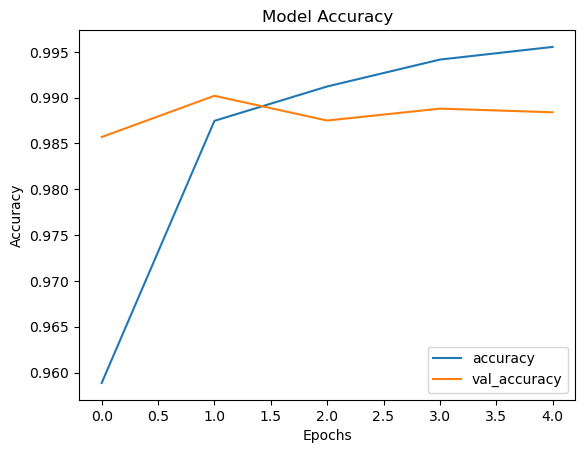

In [23]:
# Visualizando o histórico de treinamento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

### Predição dos Valores

##### Até o momento tudo que foi feito tudo que foi feito anteriormente foi preparar os dados e moldar o treinamento, agora vamos ver como o resultado se comporta.
<br>

##### Não é necessário incluir o batch size abaixo, aqui ele não vai alterar o desempenho acertivo do modelo, pois o modelo já foi definido anteriormente, na realidade nem precisava ter incluido, mas em outros casos pode ser necessário, pois ele divide o processamento em partes e isso evita que o CPU/GPU sobrecarregue.

In [25]:
y_pred_probs = model.predict(x_test, batch_size=60)  # Gerando previsões com o .predict
y_pred = y_pred_probs.argmax(axis=1) 

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


##### Essa é a saída do y_pred_probs, são os resultados dos 10 neurônios e seus valores em notação ciêntifica, que atrapalha um pouco a visualização.

In [39]:
y_pred_probs[0]

array([5.0658450e-10, 5.8668689e-08, 3.3248838e-08, 1.4655972e-08,
       1.2808804e-10, 2.4094065e-09, 3.2563991e-15, 9.9999988e-01,
       3.4134087e-10, 1.8790942e-09], dtype=float32)

##### Para ajudar a visualizar, usei o format na variável temporaria prob usando as 6 casas decimais para mostrar de uma forma absoluta.
<br>

##### Dessa forma podemos ver que as demais classes ficaram praticamente zeradas enquanto a classe 7 ficou praticamente como 1 (o que fez com que acertasse), abaixo é mostrado simplesmente como 0 e 1, porém na notação ciêntifica acima podemos ver que não é bem assim, é apenas uma SUPER aproximação.

##### Logo depois vamos o resultado do y_pred da primeira linha sendo 7, isso é possível devido ao argmax aplicado anteriormente, a função argmax retorna o indice da maior probabilidade, passando axis=1 pois queremos que isso seja feito linha a linha.

In [43]:
# Exibe as probabilidades para a primeira imagem sem notação científica
print("Probabilidades para a primeira imagem (sem notação científica):")
for i, prob in enumerate(y_pred_probs[0]):
    print(f"Classe {i}: {format(prob, '.6f')}")
    
print(f"\n\nResultado final da predição:\n{y_pred[0]}")

Probabilidades para a primeira imagem (sem notação científica):
Classe 0: 0.000000
Classe 1: 0.000000
Classe 2: 0.000000
Classe 3: 0.000000
Classe 4: 0.000000
Classe 5: 0.000000
Classe 6: 0.000000
Classe 7: 1.000000
Classe 8: 0.000000
Classe 9: 0.000000


Resultado final da predição:
7


### Verificando os erros

In [26]:
# Usando argmax para converter cada linha do y_test ao valor correspondente antes de one-hot encoding
y_true = y_test.argmax(axis=1)

In [35]:
# Voltando os valores antes do one-hot encoding, como ficou:
print(f"Como estava com one-hot encoding: \n{y_test}\n")
print(f"Como voltou a ser:\n{y_true}")

Como estava com one-hot encoding: 
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Como voltou a ser:
[7 2 1 ... 4 5 6]


##### Aqui foi preparado algumas variáveis pra usar na visualização, usando o x_test (imagens), y_pred (as tentativas) e y_true (as respostas), passando sempre o wrong_indices para indicar a posição dos que foram classificados errados.

In [ ]:
# Identificando os índices das previsões incorretas
# O i vai percorrer todo y_true e vericar se o indice de pred e true estão diferentes, se sim, ta errado.
wrong_indices = [i for i in range(len(y_true)) if y_pred[i] != y_true[i]]

In [44]:
# Imagens classificadas de forma errada
wrong_images = x_test[wrong_indices]
wrong_predictions = y_pred[wrong_indices]  # Respostas preditas erradas
true_labels = y_true[wrong_indices]        # Rótulos verdadeiros

##### Achei super interessante olhar as imagens e perceber as semelhanças entre o erro e a resposta, mas são esses casos que mostram a importância de uma boa generalização e da captação de pequenos detalhes.

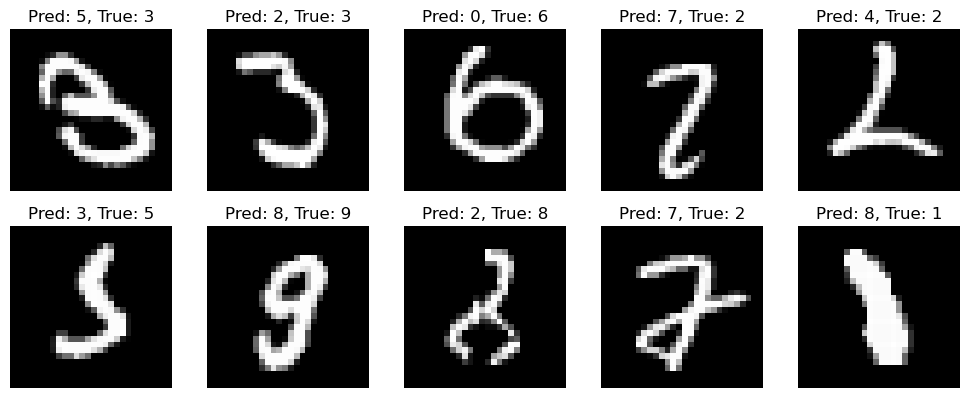

In [45]:
import matplotlib.pyplot as plt

# Plotando algumas imagens classificadas de forma errada
num_images = 10  # Número de imagens para mostrar
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(wrong_images[i].reshape(28, 28), cmap='gray')  # Reconstruindo a imagem
    plt.title(f"Pred: {wrong_predictions[i]}, True: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
# Comparando as previsões com os rótulos reais
correct_predictions = np.sum(y_pred == np.argmax(y_test, axis=1))  # Conta os acertos
incorrect_predictions = np.sum(y_pred != np.argmax(y_test, axis=1))  # Conta os erros

In [49]:
print(f"Quantidade de acertos: {correct_predictions}")
print(f"Quantidade de erros: {incorrect_predictions}")

Quantidade de acertos: 9884
Quantidade de erros: 116


### Conclusão
<br>

##### A construção do modelo de CNN é bem extensa e cheia de hyperparametros, da pra calibrar de diferentes formas dando grande versatilidade e complexidade, acabei não abordando um tunning ou grid-search para um valor ótimo nesse trabalho para não extender muito, pois o intuito era dar um chute inicial e deixar bem detalhado para possíveis estudos, consultdas.
<br>

##### Ao verificar os erros foi possível perceber o quanto pequenos detalhes podem fazer falta ao dar a correta resposta, isso vai ser feito futuramente em um trabalho a parte de tunning de CNN, provavelmente adicionando mais camadas, neurônios, dando mais opções de função de ativação ou de otimizador, dentre outras alterações.

In [51]:
model.save('modelo_MNIST.keras')